In [109]:
import pandas as  pd
import matplotlib.pyplot as plt
import numpy as np
import pickle 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df_calories=pd.read_csv("ineuron/calories.csv")
df_exercise=pd.read_csv("ineuron/exercise.csv")

data=df_exercise.merge(df_calories, on='User_ID')

#print(data.head())
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [117]:

#[:,0:-1] all rows and all expect last column (independent  variable) also feature column
#data_x = data.iloc[:,:-1].values
data_x= df.loc[:,[ 'Weight','Age','Duration']]
data_y=df.loc[:,["Calories"]]
#[:,-1]all rows and only last column (dependent variable) also target column
#data_y = data.iloc[:,-1].values

x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.3, random_state=0)

reg = LinearRegression()
reg.fit(x_train,y_train)



LinearRegression()

In [118]:
y_test

,Calories
1671,202.0
13448,163.0
10235,57.0
4720,102.0
7005,27.0
...,...
11276,29.0
3829,17.0
4646,43.0
6070,165.0


In [119]:


print("train_score=" ,reg.score(x_train,y_train))
print("train_score=" ,reg.score(x_test,y_test))
''''
pickle.dump(reg,open("taxi.pkl",'wb'))
model=pickle.load(open('taxi.pkl','rb'))
print(model.predict([[60,20,14]]))

'''


train_score= 0.9334040469489282
train_score= 0.934692589477241


'\'\npickle.dump(reg,open("taxi.pkl",\'wb\'))\nmodel=pickle.load(open(\'taxi.pkl\',\'rb\'))\nprint(model.predict([[60,20,14]]))\n\n'

[[65.54714501]]


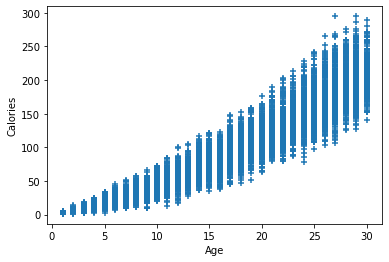

In [120]:
print(reg.predict([[60,20,14]]))
%matplotlib inline
plt.xlabel("Age")
plt.ylabel("Calories")
plt.scatter(df['Duration'],df["Calories"],cmap= None, marker="+")


In [125]:
weight=int(input("enter your Weight"))
age=int(input("enter your Age"))
duration=int(input("enter the duration of workout"))
print("The calories you burn is ",reg.predict([[weight,age,duration]]))

enter your Weight67
enter your Age56
enter the duration of workout67
The calories you burn is {} calories [[463.5979146]]


Text(0.5, 1.0, 'calories burn in certain time')

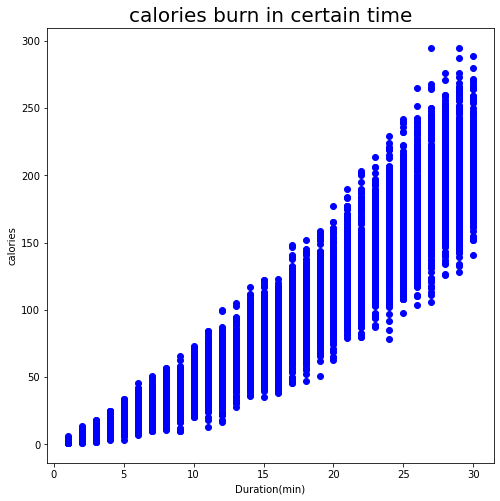

In [102]:
plt.figure(figsize=(8,8))
plt.plot(df['Duration'],df['Calories'],'bo')
plt.xlabel("Duration(min)");plt.ylabel("calories")
plt.title("calories burn in certain time",size=20)